# RNN (Recurent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated REcurent Unit)





## RNN

In [1]:
# import Libraries 

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential 



In [2]:
# ignor warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generate example data 
X =np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [4]:
X.shape, y.shape

((100, 10, 1), (100,))

In [5]:
# Define the model 
model = Sequential ([
    SimpleRNN(32, input_shape=(10, 1)), 
    Dense(1, activation='sigmoid')
])

In [6]:
# comple the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# train the model 

history = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


4/4 [==============================] - 1s 4ms/step - loss: 0.7225 - accuracy: 0.4200
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.4500
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.4900
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4900
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4900
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5100
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5200
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5300
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5400
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5800


In [8]:
# Evaluate the model 
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5800
Test Loss: 0.6796433329582214
Test Accuracy: 0.5799999833106995


# LSTM (Long Short Term Memory) is a special kind of  RNN, capable of learing long-term dependencies.                                                           

In [9]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM 
from tensorflow.keras.models import Sequential

In [10]:
# laod flight data 
flights = sns.load_dataset('flights')

In [11]:
# convert data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
# split data into training and testiong sets 
train_size = int(len(df)*0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size]

In [13]:
# Normalize the data 
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean)/train_std 
test_data = (test_data - train_mean)/train_std

Epoch 1/100
4/4 [==============================] - 2s 5ms/step - loss: 1.0225
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8470
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7018
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5733
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4704
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3831
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3161
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2583
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2212
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2022
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1935
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1899
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

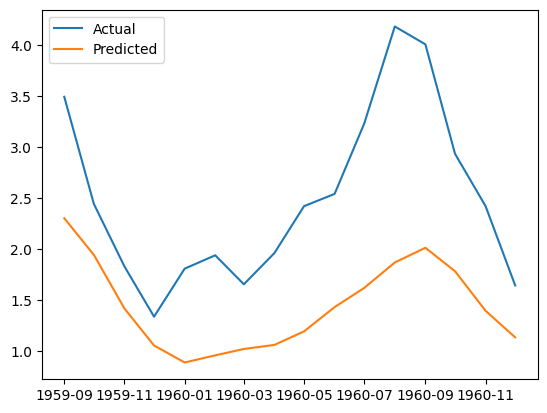

In [14]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [15]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 

In [16]:
# Sampel test data 
text ="hello world! this is a simple test exmple for rnn."
chars = sorted(list(set(text))) # get unique characters 

char_to_int = dict((c, i) for i, c in enumerate(chars))

int_to_char = dict((i, c) for i, c in enumerate(chars))

In [17]:
# Create input-output sequences 
seq_lenght =10
X=[]
y=[]

for i in range(len(text)-seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])


X = np.reshape(X, (len(X), seq_length, 1))/float(len(chars)) # normalize 
y = tf.keras.utils.to_categorical(y)

In [18]:
# Define model 

model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])


# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 2.9292
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 2.8908
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 2.8378
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 2.7610
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 2.7126
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 2.6789
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6491
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6303
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6173
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6062
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5967
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5919
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 2.9465
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9154
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8880
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 2.8624
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8224
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7775
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7264
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7217
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7151
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7121
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7134
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7119
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Here, we first convert our sample text into sequences of characters. Each sequence of characters (X) corresponds to a next character (y). The model is trained to predict y from X.

After training, we take a random seed sequence and use the model to predict the next 50 characters. The output will show the initial seed and the generated text based on it.

# GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

In [20]:
import seaborn as sns
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the chage here 
from tensorflow.keras.models import Sequential 




In [21]:
# laod flight data 
flights = sns.load_dataset("flights")

In [22]:
# Convet data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))


In [23]:
# Split dat ionto training and testiong sets 

train_size = int(len(df)*0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [24]:
# Normalize the data 

train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean)/train_std 
test_data = (test_data - train_mean)/train_std

In [25]:
# Convert data to sequences 

def to_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length =12 
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

In [26]:
# Reshape input to be [Sameps, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [27]:
# Define the model using GRU 
model = Sequential([
    GRU(32, input_shape=(seq_length,1)), # Note the change here 
    Dense(1)
])

In [28]:
# Compile the model 
model.compile(optimizer='adam', loss='mse')


In [29]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
4/4 [==============================] - 2s 5ms/step - loss: 0.9744
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8115
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6685
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5495
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4384
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3479
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2771
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2281
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2043
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1921
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1873
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1852
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [30]:
# Evalutae the model
loss = model.evaluate (X_test, y_test)
print('Test Loss', loss)

1/1 [==============================] - 0s 428ms/step - loss: 0.6194
Test Loss 0.6194498538970947


In [31]:
# Make predications on test data 
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 377ms/step


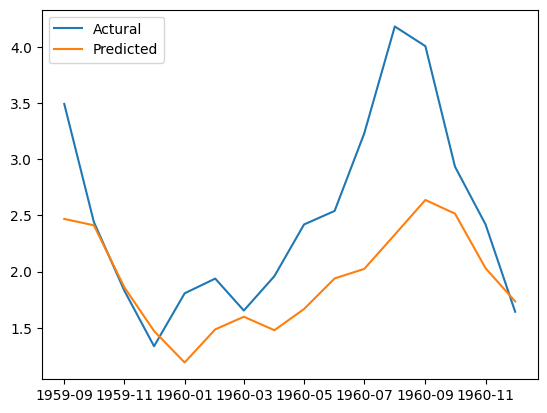

In [32]:
# plot the predictions and actual values 

import matplotlib.pyplot as plt 
plt.plot(test_data.index[seq_length+1:], y_test, label='Actural')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## GRU on Text

In [33]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GRU, Dense # import GRU instead of LSTM 

In [34]:
# Sample text data 
text ="hello World! this ia a simpoel text example for RNN"
chars = sorted(list(set(text))) # Get unique characters 
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [35]:
# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))  # Normalize
y = tf.keras.utils.to_categorical(y)


In [36]:
# Define model using GRU 

model = Sequential([
    GRU(128, input_shape=(X.shape[1], X.shape[2])), # change LSTM to GRU here 
    Dense(len(chars), activation='softmax')
])

In [37]:
# Compile and train 
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 2.9538
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9198
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 2.8943
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8606
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 2.8324
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7949
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 2.7587
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 2.7321
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7364
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 2.7221
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7017
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 2.7091
Epoch 13/100
5/5 [==============================] - 0s 6ms/st

In [38]:
# predict a sequence 

start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")


for i in range(50): # Generate 50 Charaters 
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))]for value in pattern]
    print(result, end=" ")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Seed
"  simpoel t "


r   R   N h r p p   ! l a r p     N a h i s p p l l l   t   x     N N r r p p p l l e   t   x     N 

